In [1]:
!pip install Bio
!pip install openpyxl==3.0.0

In [4]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import os
import matplotlib.pyplot as plt
import numpy as np
from Bio.codonalign.codonseq import cal_dn_ds , CodonSeq
from Bio.Align import substitution_matrices
from Bio import Align

/usr/local/lib/python3.7/dist-packages/Bio/codonalign/__init__.py:26: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning,


In [5]:
#import the file
gene_bank_file = './BS168.gb'
assert(os.path.exists(gene_bank_file)) # check that the path is valid

In [6]:
# read the file:
with open(gene_bank_file, "r") as input_handle:
    gen = SeqIO.parse(input_handle, "genbank")
    record_gb = next(gen) # content of 1st record

Part 1

1

In [7]:
dic_of_genom = {} #genom dictionary
for i in record_gb.features: ##counter for all the elements
    if i.type in dic_of_genom:
        dic_of_genom[i.type]+=1
    else:
        dic_of_genom[i.type] = 1


dic_of_genom.pop('source') #remove the source from the dictionary
print(dic_of_genom)

{'gene': 4536, 'CDS': 4237, 'rRNA': 30, 'tRNA': 86, 'misc_RNA': 93, 'misc_feature': 89, 'ncRNA': 2}


2.1 2.2

In [8]:
dictionary_before_df = {'Gen': [], 'start': [], 'end': [], 'isProtine': [], 'strand': []}

for index, i in enumerate(record_gb.features): #add relevent data to the dictionary_before_df
    dictionary_before_df['Gen'].append(i.type)
    dictionary_before_df['start'].append(i.location.start.position)
    dictionary_before_df['end'].append(i.location.end.position)
    dictionary_before_df['strand'].append((i.strand))

    if i.type == 'gene': #check if it is a protine or not
        dictionary_before_df['isProtine'].append('gene')
    elif i.type =='CDS':
        dictionary_before_df['isProtine'].append('CDS')
    else:
        dictionary_before_df['isProtine'].append('else')

df = pd.DataFrame.from_dict(dictionary_before_df) ##convert the dictionary into dataframe
df = df.drop([0]) #drop the first row which is the source
df ['len'] = df['end'] - df['start'] #calculate the len of the gene


name_of_genes = {}
### get the name of the gene if there in name , if there is no name just get the locus_tage of it.
for index , i in enumerate( record_gb.features[1:]):
    if 'gene' in i.qualifiers:
        name_of_genes[index] =i.qualifiers['gene'][0]
    else:
        name_of_genes[index] = i.qualifiers['locus_tag'][0]
df['name'] = pd.Series(name_of_genes)
print(df)

       Gen    start      end isProtine  strand   len  name
1     gene      409     1750      gene       1  1341  dnaA
2      CDS      409     1750       CDS       1  1341  dnaN
3     gene     1938     3075      gene       1  1137  dnaN
4      CDS     1938     3075       CDS       1  1137  rlbA
5     gene     3205     3421      gene       1   216  rlbA
...    ...      ...      ...       ...     ...   ...   ...
9069   CDS  4213822  4214608       CDS      -1   786  rnpA
9070  gene  4214752  4215103      gene      -1   351  rnpA
9071   CDS  4214752  4215103       CDS      -1   351  rpmH
9072  gene  4215254  4215389      gene      -1   135  rpmH
9073   CDS  4215254  4215389       CDS      -1   135   NaN

[9073 rows x 7 columns]


In [9]:
print(df[df['isProtine'] == 'gene'])

       Gen    start      end isProtine  strand   len   name
1     gene      409     1750      gene       1  1341   dnaA
3     gene     1938     3075      gene       1  1137   dnaN
5     gene     3205     3421      gene       1   216   rlbA
7     gene     3436     4549      gene       1  1113   recF
9     gene     4566     4812      gene       1   246   remB
...    ...      ...      ...       ...     ...   ...    ...
9064  gene  4211509  4212889      gene      -1  1380   mnmE
9066  gene  4213199  4213826      gene      -1   627    jag
9068  gene  4213822  4214608      gene      -1   786  oxaAA
9070  gene  4214752  4215103      gene      -1   351   rnpA
9072  gene  4215254  4215389      gene      -1   135   rpmH

[4536 rows x 7 columns]


In [10]:
print(df[df['isProtine'] == 'CDS'])

      Gen    start      end isProtine  strand   len   name
2     CDS      409     1750       CDS       1  1341   dnaN
4     CDS     1938     3075       CDS       1  1137   rlbA
6     CDS     3205     3421       CDS       1   216   recF
8     CDS     3436     4549       CDS       1  1113   remB
10    CDS     4566     4812       CDS       1   246   gyrB
...   ...      ...      ...       ...     ...   ...    ...
9065  CDS  4211509  4212889       CDS      -1  1380    jag
9067  CDS  4213199  4213826       CDS      -1   627  oxaAA
9069  CDS  4213822  4214608       CDS      -1   786   rnpA
9071  CDS  4214752  4215103       CDS      -1   351   rpmH
9073  CDS  4215254  4215389       CDS      -1   135    NaN

[4237 rows x 7 columns]


In [11]:
print(df[df['isProtine'] == 'else'])

               Gen    start      end isProtine  strand   len       name
16            rRNA     9809    11364      else       1  1555   trnO-Ile
18            tRNA    11463    11540      else       1    77   trnO-Ala
20            tRNA    11551    11627      else       1    76   rrnO-23S
22            rRNA    11708    14636      else       1  2928    rrnO-5S
24            rRNA    14691    14810      else       1   119       yaaC
...            ...      ...      ...       ...     ...   ...        ...
8961      misc_RNA  4169801  4169919      else      -1   118       yybO
8965  misc_feature  4171395  4171635      else      -1   240       yyzJ
8967  misc_feature  4171624  4171789      else      -1   165  BSU_40576
8971  misc_feature  4172258  4172405      else      -1   147       yyzL
8973  misc_feature  4172386  4172536      else      -1   150       yybN

[300 rows x 7 columns]


In [12]:
df_protine = df['isProtine'] == 'CDS' #return a dataframe of protine genes
df_protine = df[df_protine]

df_non_protine = df['isProtine'] == "else" ## reutrn a dataframe of non protine genes
df_non_protine = df[df_non_protine]

df_gene = df['isProtine'] == 'gene'
df_gene = df[df_gene]

2.3

In [13]:
#statistics for the protine gene group

prot_min = df_protine['len'].min()
prot_max = df_protine['len'].max()
prot_avg = df_protine['len'].mean()
print("protine gene group min length {} \nprotine gene group max length {}\nprotine gene group Avegrage length {}".format(prot_min , prot_max , prot_avg))

protine gene group min length 63 
protine gene group max length 16467
protine gene group Avegrage length 874.5702147746047


In [14]:
#statistics for the non protine gene group

non_prot_min = df_non_protine['len'].min()
non_prot_max = df_non_protine['len'].max()
non_prot_avg = df_non_protine['len'].mean()
print("non_protine gene group min length {} \nnon_protine gene group max length {}\nnon_protine gene group Avegrage length {}".format(non_prot_min , non_prot_max , non_prot_avg))

non_protine gene group min length 33 
non_protine gene group max length 2928
non_protine gene group Avegrage length 324.12


In [15]:
df_non_protine

,Gen,start,end,isProtine,strand,len,name
16,rRNA,9809,11364,else,1,1555,trnO-Ile
18,tRNA,11463,11540,else,1,77,trnO-Ala
20,tRNA,11551,11627,else,1,76,rrnO-23S
22,rRNA,11708,14636,else,1,2928,rrnO-5S
24,rRNA,14691,14810,else,1,119,yaaC
...,...,...,...,...,...,...,...
8961,misc_RNA,4169801,4169919,else,-1,118,yybO
8965,misc_feature,4171395,4171635,else,-1,240,yyzJ
8967,misc_feature,4171624,4171789,else,-1,165,BSU_40576
8971,misc_feature,4172258,4172405,else,-1,147,yyzL


2.4

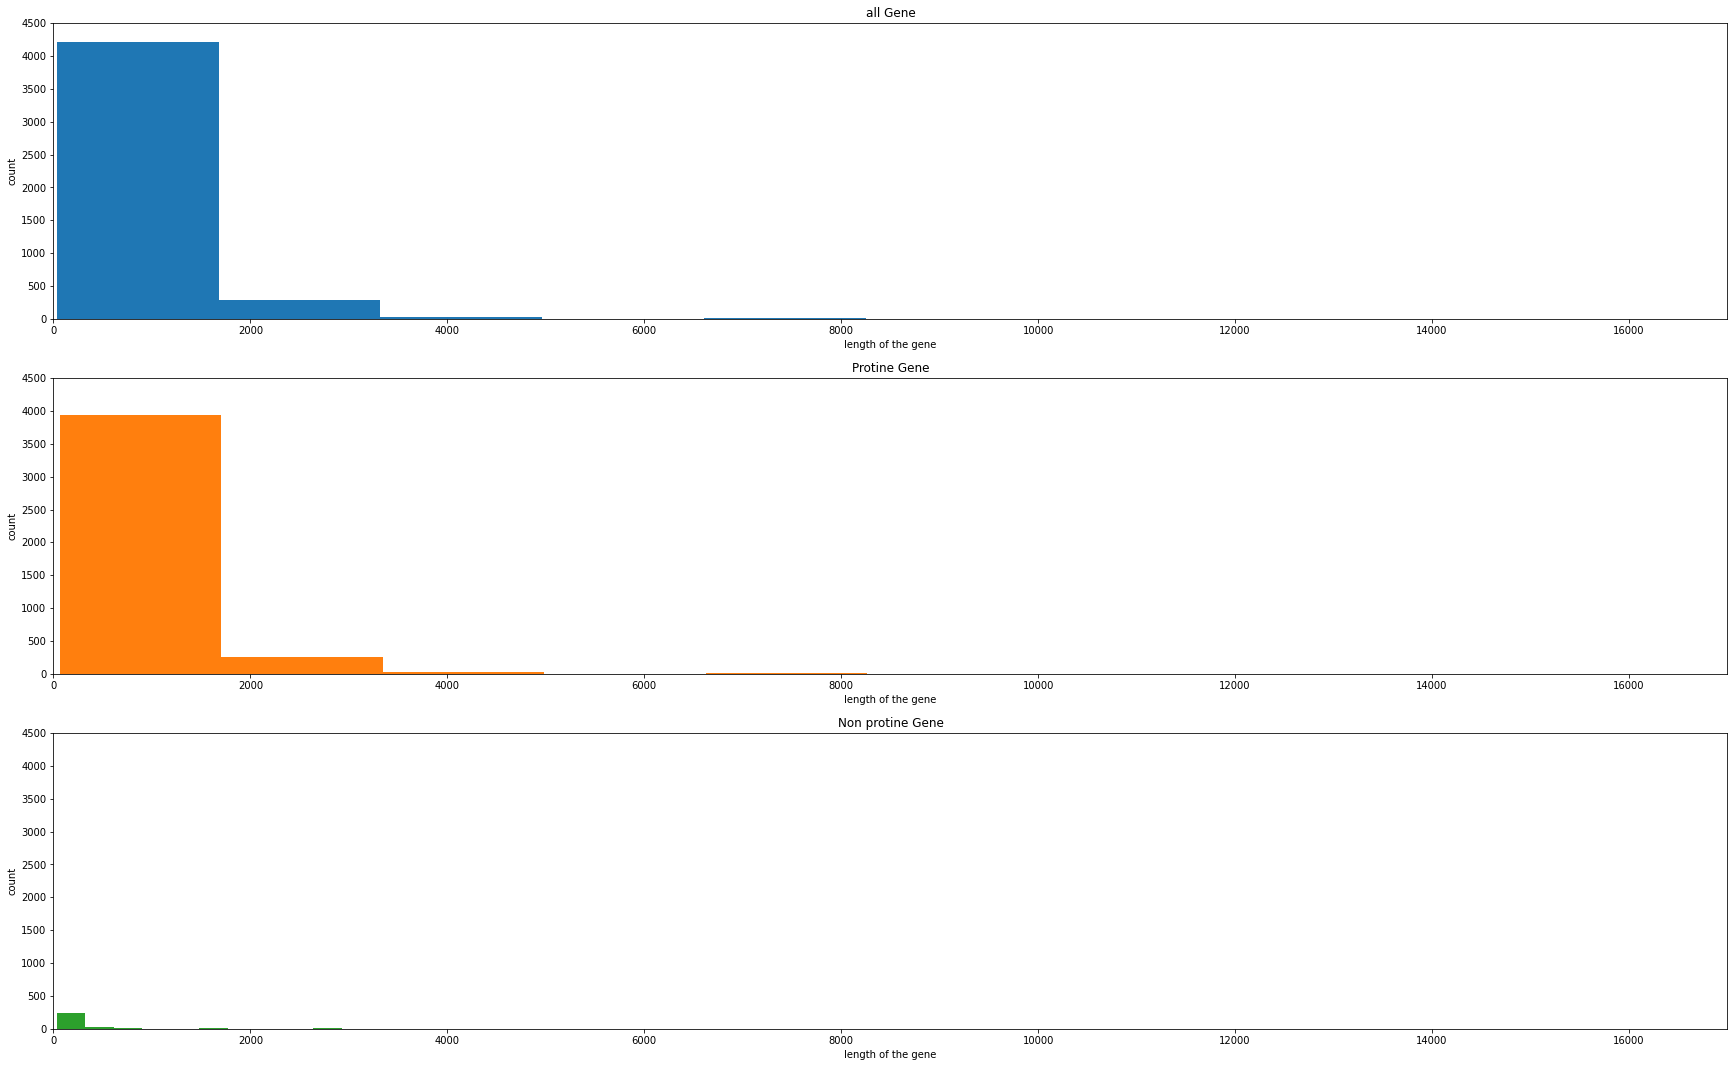

In [16]:
fig, axs = plt.subplots(3)
fig = plt.gcf()
fig.set_size_inches(30, 18.5)
axs[0].hist( df_gene['len'] )
axs[0].set_title('all Gene')
axs[1].hist(df_protine['len'],color ='tab:orange')
axs[1].set_title('Protine Gene')
axs[2].hist(df_non_protine['len'],color ='tab:green')
axs[2].set_title('Non protine Gene')
for i in range(3):
    axs[i].set_ylim([0, 4500])
    axs[i].set_xlim([0, 17000])

for ax in axs.flat:
    ax.set(xlabel='length of the gene', ylabel='count')



3.1

In [17]:
#the percentage fo the CG in hte genome
print("average of percentage of the CG in the genom {}".format(((record_gb.seq.count('C') + record_gb.seq.count('G')) / len(record_gb.seq))*100))

average of percentage of the CG in the genom 43.51440813017155


3.2

In [18]:
CG_protine = {} #cg counter for each gene

for i in range(df_protine.shape[0]):
    start = df_protine.iloc[[i] , [1]].values[0][0]
    end = df_protine.iloc[[i], [2]].values[0][0]
    seq = record_gb.seq[start:end] #seq of the gene
    CG_protine[i] =((seq.count('C') + seq.count('G') )/len(seq)) * 100# the percentage of the CG in the gene
df_protine['CG'] = pd.Series(CG_protine) # add hte dictionary as a column in the datafram

print("Average of percentage of the CG in the protine genes {}".format(df_protine['CG'].mean()))#avg of the CG in all the protine genes
df_protine.head(5)

Average of percentage of the CG in the protine genes 42.99335683927281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gen,start,end,isProtine,strand,len,name,CG
2,CDS,409,1750,CDS,1,1341,dnaN,43.518519
4,CDS,1938,3075,CDS,1,1137,rlbA,36.991870
6,CDS,3205,3421,CDS,1,216,recF,44.403893
8,CDS,3436,4549,CDS,1,1113,remB,43.490116
10,CDS,4566,4812,CDS,1,246,gyrB,45.988701


3.4

In [19]:
df_protine['CG']

2       43.518519
4       36.991870
6       44.403893
8       43.490116
10      45.988701
          ...    
9065          NaN
9067          NaN
9069          NaN
9071          NaN
9073          NaN
Name: CG, Length: 4237, dtype: float64

[Text(0, 0.5, 'count of the gene'),
 Text(0.5, 0, 'percentage of the CG in the gene')]

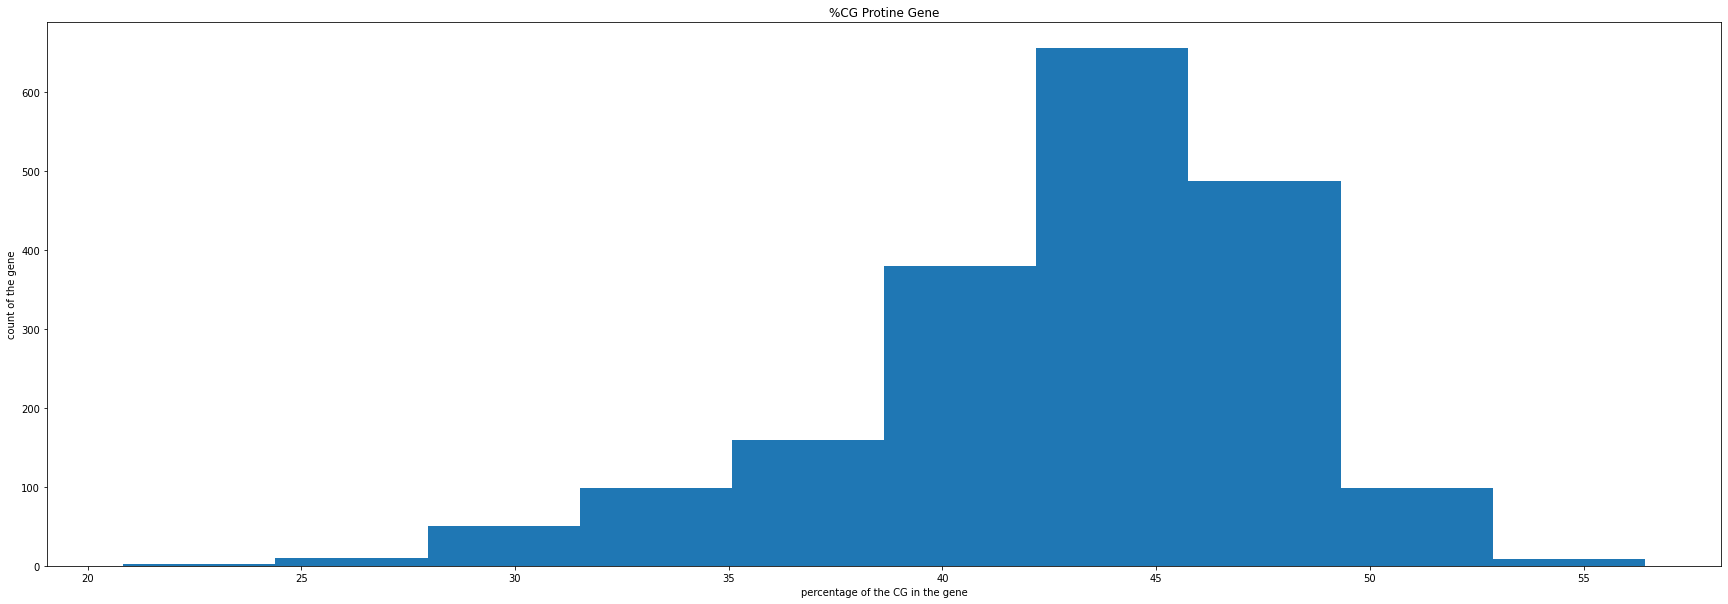

In [20]:
fig, axs = plt.subplots(1) # %CG Protine Gene
fig.set_size_inches(30, 10)
axs.hist(df_protine['CG'])
axs.set_title('%CG Protine Gene')
axs.set(xlabel='percentage of the CG in the gene', ylabel='count of the gene')

3.5

In [21]:
print("5 gen rich of CG")
temp1 = df_protine.sort_values(ascending=False , by=['CG']).iloc[:5]
temp1 = temp1.drop(columns = ['isProtine' , 'len' , 'Gen'])

print()
print(temp1)
print("="*50)
print()

print("5 gen low of CG")
temp2 = df_protine.sort_values(ascending=True , by=["CG"]).iloc[:5]
temp2 = temp2.drop(columns = ['isProtine' , 'len','Gen'])
print(temp2)

5 gen rich of CG

        start      end  strand  name         CG
3994  1918405  1918723       1  dinL  56.438026
3538  1646998  1647952       1  rsmB  54.685100
3984  1916005  1916545      -1  fosB  54.314721
728    330770   332396       1   mdr  53.833605
4150  2027508  2027802       1  yoaG  53.463733

5 gen low of CG
        start      end  strand  name         CG
2722  1277685  1278165       1  yjzH  20.833333
1816   863861   865037      -1  chaA  23.383085
1810   862003   862474       1  yfkI  24.521073
4050  1938924  1940322       1  eglS  25.450450
2220  1047071  1049093       1  yheG  26.100629


4

In [22]:
error_dic = {}
plus = df_protine[df_protine['strand'] == 1]
for i in range(0 ,plus.shape[0]):
    start = plus.iloc[[i] , [1]].values[0][0]
    end = plus.iloc[[i], [2]].values[0][0]
    seq = record_gb.seq[start:end]
    if len(seq) % 3 != 0:
        error_dic[plus.iloc[[i] , [6]].values[0][0]] = 'cant be divided into 3'
        continue
    coding_dna = Seq(seq) # create a Seq object from the gene sequence

    translat_seq = str(coding_dna.translate(table=record_gb.features[plus.index[i]].qualifiers['transl_table'][0], cds=True))  #
    real_translation = record_gb.features[plus.index[i]].qualifiers['translation']

    if translat_seq == real_translation[0]:
        continue
    else:
        error_dic[plus.iloc[[i] , [6]].values[0][0]] = 'dna seq is not compatible with the protine seq'



menus = df_protine[df_protine['strand'] == -1]
for i in range(0,menus.shape[0]):
    start = menus.iloc[[i], [1]].values[0][0]
    end = menus.iloc[[i], [2]].values[0][0]
    seq = record_gb.seq[start:end]
    if len(seq) % 3 != 0:
        error_dic[menus.iloc[[i] , [6]].values[0][0]] = 'cant be divided into 3'
        continue
    if i == 628:
        error_dic[menus.iloc[[i] , [6]].values[0][0]] = 'stop codone error'
        continue

    coding_dna = Seq(seq) # create a Seq object from the gene sequence
    s_reverse_comp = seq.reverse_complement()  # Reverse and Complement
    table_translate = record_gb.features[menus.index[i]].qualifiers['transl_table'][0]
    trans2 = str(s_reverse_comp.translate(table=table_translate, cds=True))  # remember to use the accurte codon table
    real_translation = record_gb.features[menus.index[i]].qualifiers['translation'][0]
    if trans2 == real_translation:
       continue
    else:
        error_dic[menus.iloc[[i] , [6]].values[0][0]] = 'dna seq is not compatible with the protine seq'
print(error_dic)
error_df = pd.DataFrame(error_dic.items())
error_df.to_csv('gene_exceptions.csv')

{'srdFi': 'cant be divided into 3', 'nrdEB': 'stop codone error', 'secA': 'cant be divided into 3'}


Add additional information on the dataframe
INSTROCTION

In [23]:
df = df.sort_values(by=['start'], ascending=True)
df

,Gen,start,end,isProtine,strand,len,name
1,gene,409,1750,gene,1,1341,dnaA
2,CDS,409,1750,CDS,1,1341,dnaN
3,gene,1938,3075,gene,1,1137,dnaN
4,CDS,1938,3075,CDS,1,1137,rlbA
5,gene,3205,3421,gene,1,216,rlbA
...,...,...,...,...,...,...,...
9069,CDS,4213822,4214608,CDS,-1,786,rnpA
9070,gene,4214752,4215103,gene,-1,351,rnpA
9071,CDS,4214752,4215103,CDS,-1,351,rpmH
9072,gene,4215254,4215389,gene,-1,135,rpmH


In [24]:
df.to_csv('./part_a.csv') #save to a csv file

==================================================================================================================================================================================================================================================================================================================================================================================================================

PART 2

In [25]:
#read the xlsx file

xls = pd.read_excel(open('./uniprot.xlsx', 'rb'))
print(xls.info())

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8541 entries, 0 to 8540
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entry                         8541 non-null   object 
 1   Entry name                    8541 non-null   object 
 2   Status                        8541 non-null   object 
 3   Protein names                 8541 non-null   object 
 4   Organism                      8541 non-null   object 
 5   Length                        8541 non-null   float64
 6   Gene names                    8540 non-null   object 
 7   Transmembrane                 1987 non-null   object 
 8   Gene names  (ordered locus )  4188 non-null   object 
 9   Gene names  (primary )        6085 non-null   object 
 10  Sequence                      8541 non-null   object 
dtypes: float64(1), object(10)
memory usage: 734.1+ KB
None


1

In [26]:
xls['Gene names  (primary )'] = xls['Gene names  (primary )']
for i in xls['Gene names  (primary )']:
    print(i)

Streaming output truncated to the last 5000 lines.
lytT
thrB
khtU
mmr
mrpA
leuB
mneP
levR
leuC
licR
ppnKA
lplD
lipA
liaG
malS
maeA
mcpC
noc
nos
nfeD1
nfeD2
nnrD
menB
metK
mgsR
mfd
med
mnmA
moxC
mtnU
bglC
catD
ctsR
flgB
fnr
dacC
dnaB
ald
dnaG
ganQ
ganR
ganS
gabD
egsA
fruR
ftsW
dps
ftsE
ftsZ
fumC
drm
folB
dinB2
glcP
dppD
dpaB
glcR
dppE
gcvT
tuf
glvA
glvR
gmuD
gmuR
glpF
nfo
ndoAI
xseA
fabHA
fadA
floA
floT
ycgT
fadR
fadN
gcvPB
glpT
glxK
glmS
alsS
kduD
acuA
lysC
acsA
albA
acyP
rocF
araE
clpY
dhbA
mgfK
gltA
gltB
gltC
gltP
glsA1
glsA2
gltR
gpr
gltT
estB
exuR
fabI
fliM
gudD
hrcA
kduI
khtT
fadF
glnH
gyrA
ispE
moaA
mscL
kinC
kinD
kinE
leuD
mrpC
mrpD
mntB
mntC
levB
ku
murE
lcfA
ktrA
lnrM
liaI
mbl
lytG
mdh
yvdJ
lutC
miaA
metQ
mgtE
yfkN
mnmG
msrA
mtnX
nagA
odhB
opuBA
etfA
cysK
cssR
fliK
lysA
dacA
czcO
dinB
estA
epsN
glpK
ispH
gntP
isp
ispD
iolA
yvgN
mmgB
kapB
hfq
hisI
hisF
sipS
sipT
sipV
lmrA
nrdR
mraZ
moeB
oppA
nprE
opuBB
ydaD
mciZ
lytA
lytC
lytD
mapB
lnrJ
liaS
menA
mhqN
murD
mutT
nadC
naiP
nap
na

In [27]:
df_protine['name']

2        dnaN
4        rlbA
6        recF
8        remB
10       gyrB
        ...  
9065      jag
9067    oxaAA
9069     rnpA
9071     rpmH
9073      NaN
Name: name, Length: 4237, dtype: object

In [28]:
df_protine_after_zero = {}
df_protine_after_zero_trans = {}
df_protine_after_zero_no_repeat = {}

for i in range(len(df_protine['name'])):
    df_protine_after_zero[i] = 0
    df_protine_after_zero_trans[i] = 0


xls_after_zero_no_repeat = {}
xls_after_zero = {}

for i in range(len(xls['Gene names  (primary )'])):
    xls_after_zero[i] = 0

for i in df_protine['name']:
    df_protine_after_zero_no_repeat[i] = 0
for i in xls['Gene names  (primary )']:
    xls_after_zero_no_repeat[i] = 0

In [29]:
print(df_protine_after_zero_no_repeat)

{'dnaN': 0, 'rlbA': 0, 'recF': 0, 'remB': 0, 'gyrB': 0, 'gyrA': 0, 'rrnO-16S': 0, 'guaB': 0, 'dacA': 0, 'pdxS': 0, 'pdxT': 0, 'tboS': 0, 'trnSL-Ser1': 0, 'dgk': 0, 'sleL': 0, 'yaaI': 0, 'tadA': 0, 'scr': 0, 'ebfC': 0, 'recR': 0, 'yaaL': 0, 'bofA': 0, 'rrnA-16S': 0, 'xpaC': 0, 'yaaN': 0, 'yaaO': 0, 'tmk': 0, 'darA': 0, 'yaaR': 0, 'holB': 0, 'ricT': 0, 'dnaH': 0, 'trmNF': 0, 'yazA': 0, 'rsmI': 0, 'abrB': 0, 'metS': 0, 'dayD': 0, 'yabE': 0, 'rnmV': 0, 'rsmA': 0, 'prtG': 0, 'veg': 0, 'sspF': 0, 'ispE': 0, 'purR': 0, 'ridA': 0, 'spoVG': 0, 'glmU': 0, 'prs': 0, 'ctc': 0, 'pth': 0, 'fin': 0, 'mfd': 0, 'spoVT': 0, 'yabM': 0, 'yabN': 0, 'hslR': 0, 'spcP': 0, 'spcQ': 0, 'divIC': 0, 'yabR': 0, 'trnSL-Met1': 0, 'yabS': 0, 'prkT': 0, 'tilS': 0, 'hprT': 0, 'ftsH': 0, 'coaX': 0, 'hslO': 0, 'yacD': 0, 'cysK': 0, 'pabB': 0, 'pabA': 0, 'pabC': 0, 'folP': 0, 'folB': 0, 'folK': 0, 'yazB': 0, 'dusB': 0, 'lysS': 0, 'rrnJ-16S': 0, 'mcsA': 0, 'mcsB': 0, 'clpC': 0, 'radA': 0, 'disA': 0, 'yacL': 0, 'ispD': 0, '

In [30]:
for index , i in enumerate(xls['Gene names  (primary )']):
    for index1 , j in enumerate(df_protine['name']):

        if i == j:

            xls_after_zero_no_repeat[i] = 1
            df_protine_after_zero_no_repeat[j] = 1
            df_protine_after_zero[index1] = 1
            xls_after_zero[index] = 1
            if not pd.isnull(xls.iloc[[index] , [7]].values[0][0]):
                df_protine_after_zero_trans[index1] = 1


In [31]:
df_protine['intersection'] = pd.Series(df_protine_after_zero).values
df_protine['intersection_with_transmember'] = pd.Series(df_protine_after_zero_trans).values
df_protine['intersection'] = df_protine['intersection'].values == 1
df_protine['intersection_with_transmember'] = df_protine['intersection_with_transmember'].values == 1
df_protine.head(100)

,Gen,start,end,isProtine,strand,len,name,CG,intersection,intersection_with_transmember
2,CDS,409,1750,CDS,1,1341,dnaN,43.518519,True,False
4,CDS,1938,3075,CDS,1,1137,rlbA,36.991870,True,False
6,CDS,3205,3421,CDS,1,216,recF,44.403893,True,False
8,CDS,3436,4549,CDS,1,1113,remB,43.490116,True,False
10,CDS,4566,4812,CDS,1,246,gyrB,45.988701,True,False
...,...,...,...,...,...,...,...,...,...,...
252,CDS,115268,116018,CDS,1,750,raeA,47.603834,False,False
254,CDS,116024,116537,CDS,1,513,sigH,46.474359,True,False
256,CDS,116599,117256,CDS,1,657,rpmGB,45.414847,True,False
258,CDS,117348,117498,CDS,1,150,secE,42.894057,True,True


In [32]:
xls['intersection'] = pd.Series(xls_after_zero)
xls['intersection'] = xls['intersection'] == 1
xls['at_least_one_transmember'] =  (xls['intersection'] == True) &( xls["Transmembrane"].notna())

xls.head(20)

,Entry,Entry name,Status,Protein names,Organism,Length,Gene names,Transmembrane,Gene names (ordered locus ),Gene names (primary ),Sequence,intersection,at_least_one_transmember
0,P54479,ZUR_BACSU,reviewed,Zinc-specific metallo-regulatory protein,Bacillus subtilis (strain 168),145.0,zur yqfV BSU25100,NaN,BSU25100,zur,MNVQEALNLLKENGYKYTNKREDMLQLFADSDRYLTAKNVLSALND...,True,False
1,P28366,SECA_BACSU,reviewed,Protein translocase subunit SecA (EC 7.4.2.8),Bacillus subtilis (strain 168),841.0,secA div+ BSU35300,NaN,BSU35300,secA,MLGILNKMFDPTKRTLNRYEKIANDIDAIRGDYENLSDDALKHKTI...,True,False
2,P68577,SUNA_BACSU,reviewed,SPbeta prophage-derived bacteriocin sublancin-168,Bacillus subtilis (strain 168),56.0,sunA yolG BSU21480,NaN,BSU21480,sunA,MEKLFKEVKLEELENQKGSGLGKAQCAALWLQCASGGTIGCGGGAV...,True,False
3,P39792,RECU_BACSU,reviewed,Holliday junction resolvase RecU (EC 3.1.22.4),Bacillus subtilis (strain 168),206.0,recU prfA yppB BSU22310,NaN,BSU22310,recU,MIRYPNGKTFQPKHSVSSQNSQKRAPSYSNRGMTLEDDLNETNKYY...,True,False
4,P37547,RNM5_BACSU,reviewed,Ribonuclease M5 (EC 3.1.26.8) (RNase M5) (Ribo...,Bacillus subtilis (strain 168),186.0,rnmV yabF BSU00410,NaN,BSU00410,rnmV,MKIKEIIVVEGRDDTARIKLAVDADTIETNGSAIDDHVIDQIRLAQ...,True,False
5,P17896,SP4B_BACSU,reviewed,SpoIVB peptidase (EC 3.4.21.116) (Sporulation ...,Bacillus subtilis (strain 168),426.0,spoIVB BSU24230,NaN,BSU24230,spoIVB,MPDNIRKAVGLILLVSLLSVGLCKPLKEYLLIPTQMRVFETQTQAI...,True,False
6,P39115,VMLR_BACSU,reviewed,Ribosome protection protein VmlR (Multidrug re...,Bacillus subtilis (strain 168),547.0,vmlR expZ BSU05610,NaN,BSU05610,vmlR,MKEIVTLTNVSYEVKDQTVFKHVNASVQQGDIIGIIGKNGAGKSTL...,True,False
7,O34344,SDPC_BACSU,reviewed,Sporulation delaying protein C (SdpC) (Canniba...,Bacillus subtilis (strain 168),203.0,sdpC yvaY BSU33770,NaN,BSU33770,sdpC,MKSKLLRLLIVSMVTILVFSLVGLSKESSTSAKENHTFSGEDYFRG...,False,False
8,P39135,SFP_BACSU,reviewed,4'-phosphopantetheinyl transferase Sfp (EC 2.7...,Bacillus subtilis (strain 168),224.0,sfp lpa-8 BSU03570,NaN,BSU03570,sfp,MKIYGIYMDRPLSQEENERFMSFISPEKREKCRRFYHKEDAHRTLL...,False,False
9,O32163,SUFU_BACSU,reviewed,Zinc-dependent sulfurtransferase SufU (EC 2.-....,Bacillus subtilis (strain 168),147.0,sufU iscU nifU yurV BSU32680,NaN,BSU32680,sufU,MSFNANLDTLYRQVIMDHYKNPRNKGVLNDSIVVDMNNPTCGDRIR...,True,False


In [33]:
print("uniprot common is {} from {} ".format(list(xls_after_zero.values()).count(1) , len(xls_after_zero) ))
print("genbank common is {} from {}".format(list(df_protine_after_zero.values()).count(1) ,len(df_protine_after_zero) ))

uniprot common is 4949 from 8541 
genbank common is 3589 from 4237


In [34]:
print("uniprot common with no repeat is {} from {}, So there is {} protines not in common ".format(list(xls_after_zero_no_repeat.values()).count(1) , len(xls_after_zero_no_repeat), len(xls_after_zero_no_repeat) - list(xls_after_zero_no_repeat.values()).count(1) ))
print("genbank common with no repeat is {} from {}, So there is {} protines not in common".format(list(df_protine_after_zero_no_repeat.values()).count(1) ,len(df_protine_after_zero_no_repeat), len(df_protine_after_zero_no_repeat) -  list(df_protine_after_zero_no_repeat.values()).count(1)))

uniprot common with no repeat is 3583 from 4484, So there is 901 protines not in common 
genbank common with no repeat is 3583 from 4230, So there is 647 protines not in common


Text(0.5, 1.0, 'common between the genbank and uniprot for the according to the uniprot ')

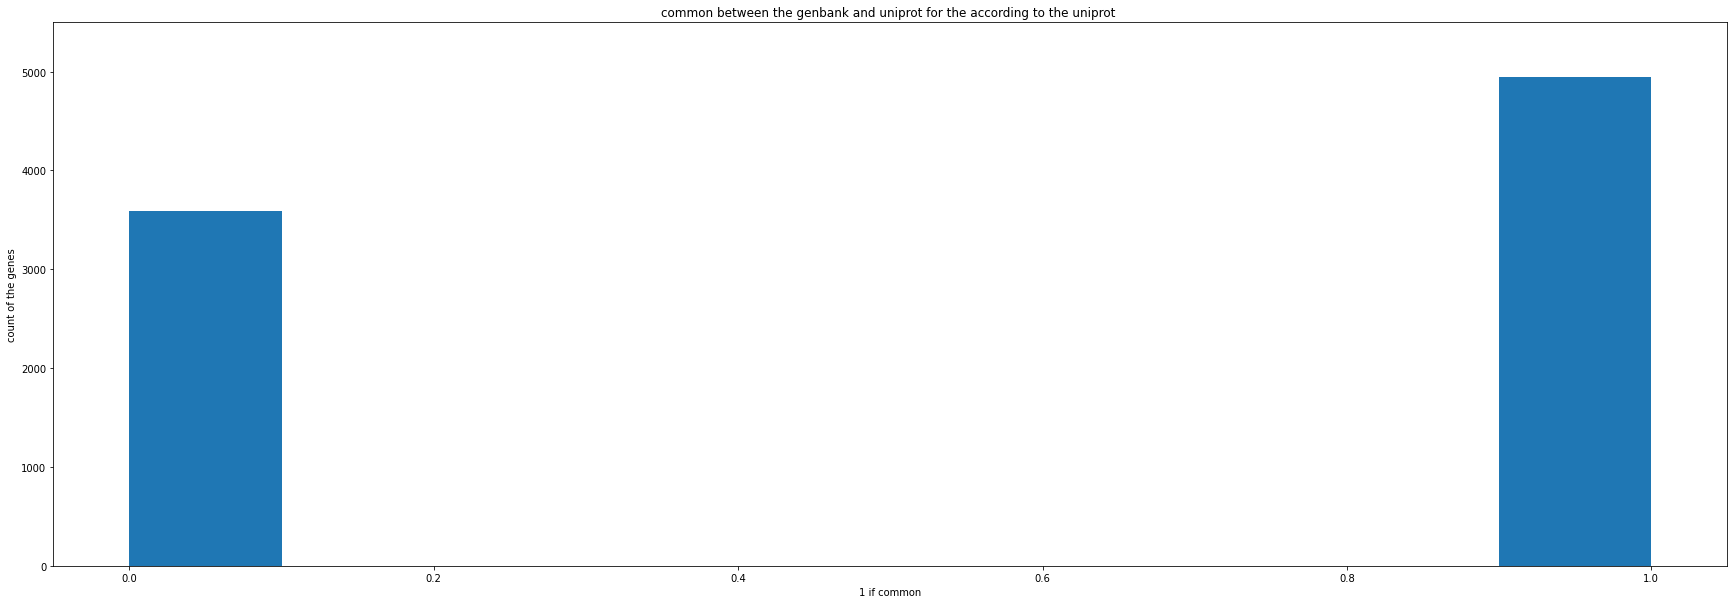

In [35]:
x = list(xls_after_zero.keys())
y = list(xls_after_zero.values())
fig, axs = plt.subplots(1) # %CG Protine Gene
fig.set_size_inches(30, 10)
plt.hist(y)
axs.set(ylabel='count of the genes', xlabel='1 if common')
axs.set_ylim([0, 5500])
axs.set_title('common between the genbank and uniprot for the according to the uniprot ')

Text(0.5, 1.0, 'common between the genbank and uniprot for the according to the genbank ')

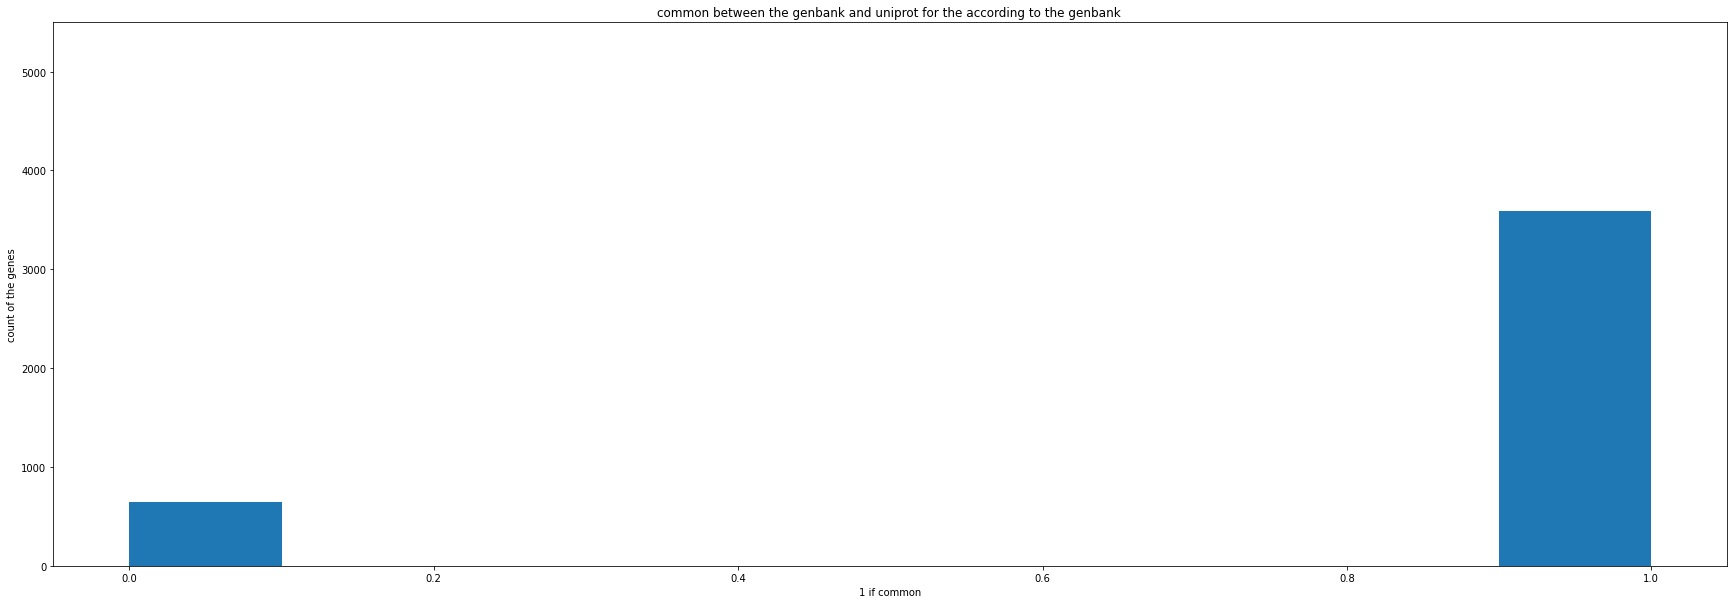

In [36]:
a = list(df_protine_after_zero.keys())
b = list(df_protine_after_zero.values())

fig, axs = plt.subplots(1) # %CG Protine Gene
fig.set_size_inches(30, 10)

plt.hist(b)
axs.set(ylabel='count of the genes', xlabel='1 if common')
axs.set_ylim([0, 5500])
axs.set_title('common between the genbank and uniprot for the according to the genbank ')

In [37]:
trans_df=xls[xls['Transmembrane'].notnull()].reset_index()
trans_df

,index,Entry,Entry name,Status,Protein names,Organism,Length,Gene names,Transmembrane,Gene names (ordered locus ),Gene names (primary ),Sequence,intersection,at_least_one_transmember
0,19,O34507,PRKC_BACSU,reviewed,Serine/threonine-protein kinase PrkC (Ser/Thr-...,Bacillus subtilis (strain 168),648.0,prkC yloP BSU15770,"TRANSMEM 331..351; /note=""Helical""; /evidenc...",BSU15770,prkC,MLIGKRISGRYQILRVIGGGGMANVYLAEDIILDREVAIKILRFDY...,True,True
1,27,L8E9J8,L8E9J8_BACSU,unreviewed,YjcZ family sporulation protein,Bacillus subtilis (strain 168),25.0,yrpDX BSU_26826 HIR78_15775,"TRANSMEM 6..24; /note=""Helical""; /evidence=""...",NaN,yrpDX,MRSFPLIVVLFILLIIVGTSFFGGY,False,False
2,49,A0A6M3Z884,A0A6M3Z884_BACSU,unreviewed,Uncharacterized protein,Bacillus subtilis (strain 168),58.0,HIR78_02925 HIR78_12870,"TRANSMEM 7..25; /note=""Helical""; /evidence=""...",NaN,NaN,MNNKKNIFDIVMYIIFGVLSLFLVAKTDYGTGVLVFVAILYLAVIA...,False,False
3,54,A0A6M3ZCI5,A0A6M3ZCI5_BACSU,unreviewed,Uncharacterized protein,Bacillus subtilis (strain 168),124.0,HIR78_11095 HIR78_12460,"TRANSMEM 52..72; /note=""Helical""; /evidence=...",NaN,NaN,MSKTIGITGFFLSIVVQSFSANDSLSHKIATGLLFVSIAIYNFDHA...,False,False
4,71,A3F397,A3F397_BACSU,unreviewed,Menaquinol:cytochrome c oxidoreductase (Ubiqui...,Bacillus subtilis (strain 168),167.0,qcrA HIR78_13545,"TRANSMEM 12..33; /note=""Helical""; /evidence=...",NaN,qcrA,MGGKHDISRRQFLNYTLTGVGGFMAASMLMPMVRFALDPVLKSTGK...,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,8517,A0A6M3ZHG4,A0A6M3ZHG4_BACSU,unreviewed,PspC domain-containing protein,Bacillus subtilis (strain 168),65.0,HIR78_20220,"TRANSMEM 33..57; /note=""Helical""; /evidence=...",NaN,NaN,MNKLYRSEKNKKIAGVIGGLAEYFNWDASLLRVITVILAIMTSVLP...,False,False
1983,8521,A0A6M3ZKV0,A0A6M3ZKV0_BACSU,unreviewed,Uncharacterized protein,Bacillus subtilis (strain 168),57.0,HIR78_10775 HIR78_11675 HIR78_12110,"TRANSMEM 32..56; /note=""Helical""; /evidence=...",NaN,NaN,MIVTAWILLIVFGLFALSDFDLTENETKHIKFFILMKFVSVFIAAI...,False,False
1984,8526,A0A6M4JJZ1,A0A6M4JJZ1_BACSU,unreviewed,Aspartate phosphatase,Bacillus subtilis (strain 168),58.0,HIR78_11580 HIR78_11945,"TRANSMEM 6..25; /note=""Helical""; /evidence=""...",NaN,NaN,MKLKHASVFILAIVLIGFVSIYLTNTQKDVQEARRGHTASIGFTDG...,False,False
1985,8537,A0A6M3ZCJ8,A0A6M3ZCJ8_BACSU,unreviewed,Uncharacterized protein,Bacillus subtilis (strain 168),114.0,HIR78_10830 HIR78_11730,"TRANSMEM 31..52; /note=""Helical""; /evidence=...",NaN,NaN,MIVRGEGNAYRKVKNVVDNSSLENMKRNKNLIYLFTLLKGISFIVP...,False,False


2.1

min length: 10
max length: 43
avg length: 20.395294338207723


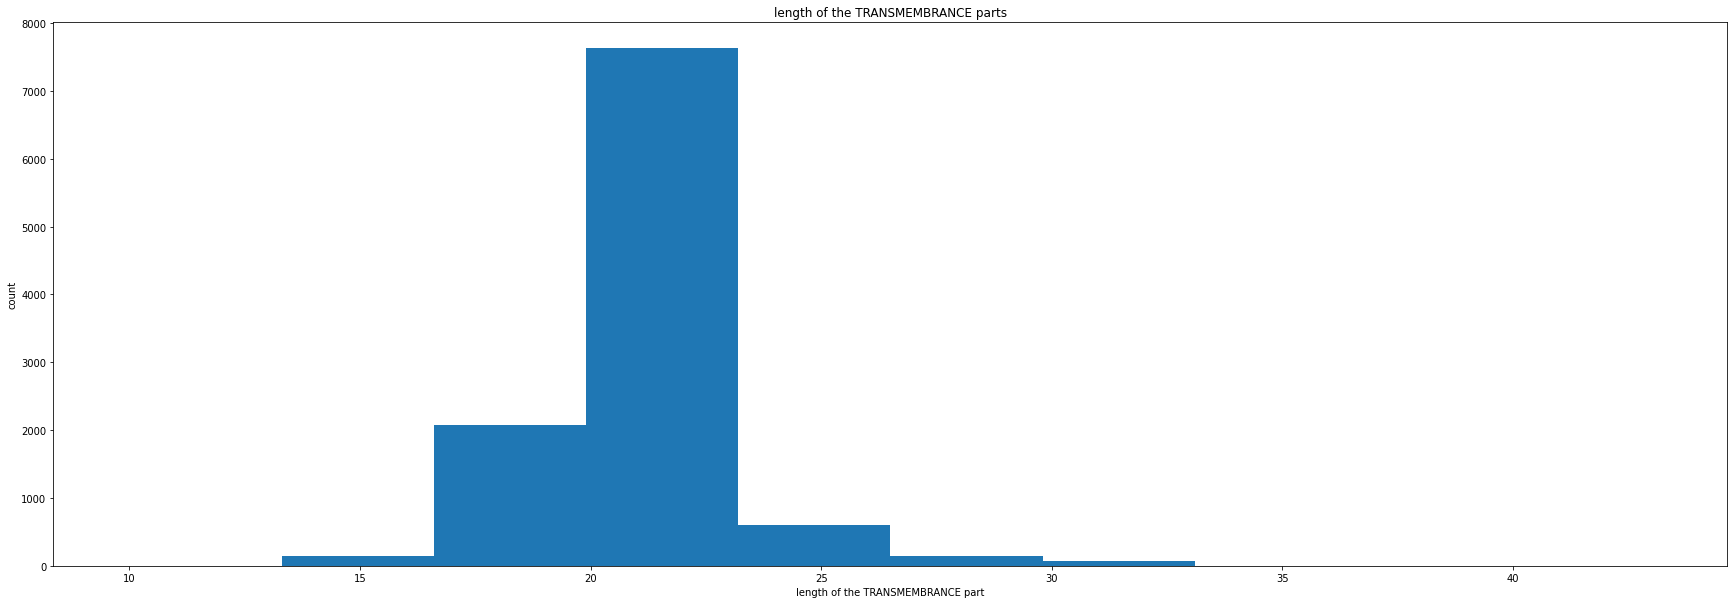

In [38]:
temp_dictionary = {}
#for loop over all the transmembrance lines
for index, i in enumerate(trans_df.Transmembrane):
     res_list = i.split(" ")
     #for loop over the spitted strings
     for index1 , j in enumerate(res_list):
         #check the TRANSMEM string and take the string after it
         if j == "TRANSMEM":
             res_list[index1 + 1] = res_list[index1 + 1][:-1]
             str1 , str2 = res_list[index1 + 1].split("..")
             if index in temp_dictionary:
                temp_dictionary[index].append([str1 , str2])
             else:
                temp_dictionary[index] = [[str1 , str2]]

#len of the each TRANSMEMBRANCE parts
len_array =[]
for i in temp_dictionary:
    for j in temp_dictionary[i]:
        len_array.append(int(j[1])-int(j[0]))

len_array = np.array(len_array)
fig, axs = plt.subplots(1)
fig.set_size_inches(30, 10)
axs.hist(len_array)
axs.set_title('length of the TRANSMEMBRANCE parts')
axs.set(ylabel='count', xlabel='length of the TRANSMEMBRANCE part')
print("min length:" , len_array.min())
print("max length:", len_array.max())
print("avg length:" , len_array.mean())

# temp_dictionary

2.2

Average of percentage of hydrophobic 0.04611083306678117


Text(0.5, 1.0, 'percentage of the hydrophobic amino accide of the TRANSMEMBRANCE parts')

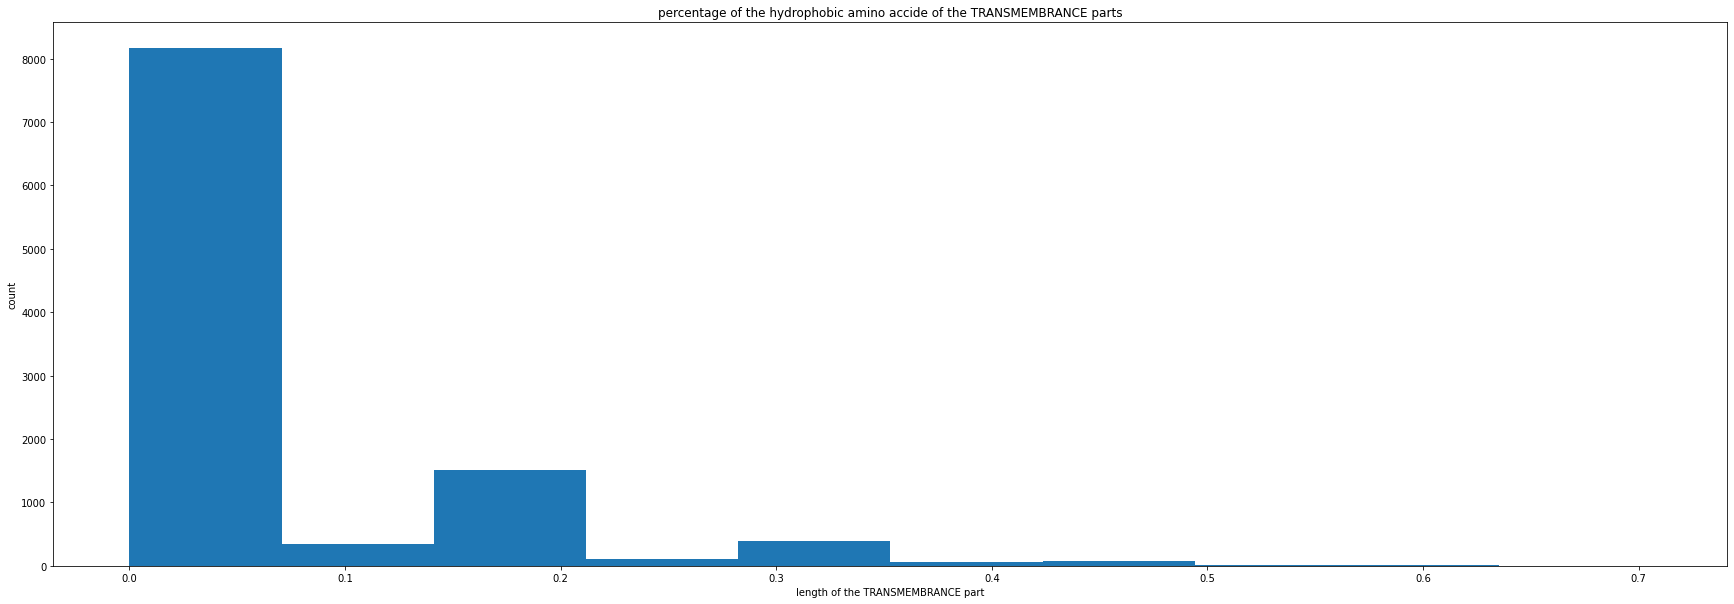

In [40]:
new_arr = []
hydrophobic = ['ALA', 'PHE','LEU',"ILE","VAL","MET","PRO","TRP"]
two_b = {}
#for over all the start and end coordinatos, of the TRANSMEMBRANCE
for index, i in enumerate(temp_dictionary):
    counter = 0
    for j in temp_dictionary[i]:
        start = int(j[0])
        end = int (j[1])
        seq = trans_df['Sequence'][i][start:end] #get the sequence
        len_of_seq = len(seq)

        for word in hydrophobic: ##check if hte word in the seq and update the dictionary
            if word in seq:
                counter+=1
        new_arr.append(counter / (len_of_seq/3))

print("Average of percentage of hydrophobic {}".format(sum(new_arr) / len(new_arr)))
fig, axs = plt.subplots(1)
fig.set_size_inches(30, 10)
axs.hist(new_arr)
axs.set(ylabel='count', xlabel='length of the TRANSMEMBRANCE part')
axs.set_title('percentage of the hydrophobic amino accide of the TRANSMEMBRANCE parts')

3

In [41]:
xls.head(20)

,Entry,Entry name,Status,Protein names,Organism,Length,Gene names,Transmembrane,Gene names (ordered locus ),Gene names (primary ),Sequence,intersection,at_least_one_transmember
0,P54479,ZUR_BACSU,reviewed,Zinc-specific metallo-regulatory protein,Bacillus subtilis (strain 168),145.0,zur yqfV BSU25100,NaN,BSU25100,zur,MNVQEALNLLKENGYKYTNKREDMLQLFADSDRYLTAKNVLSALND...,True,False
1,P28366,SECA_BACSU,reviewed,Protein translocase subunit SecA (EC 7.4.2.8),Bacillus subtilis (strain 168),841.0,secA div+ BSU35300,NaN,BSU35300,secA,MLGILNKMFDPTKRTLNRYEKIANDIDAIRGDYENLSDDALKHKTI...,True,False
2,P68577,SUNA_BACSU,reviewed,SPbeta prophage-derived bacteriocin sublancin-168,Bacillus subtilis (strain 168),56.0,sunA yolG BSU21480,NaN,BSU21480,sunA,MEKLFKEVKLEELENQKGSGLGKAQCAALWLQCASGGTIGCGGGAV...,True,False
3,P39792,RECU_BACSU,reviewed,Holliday junction resolvase RecU (EC 3.1.22.4),Bacillus subtilis (strain 168),206.0,recU prfA yppB BSU22310,NaN,BSU22310,recU,MIRYPNGKTFQPKHSVSSQNSQKRAPSYSNRGMTLEDDLNETNKYY...,True,False
4,P37547,RNM5_BACSU,reviewed,Ribonuclease M5 (EC 3.1.26.8) (RNase M5) (Ribo...,Bacillus subtilis (strain 168),186.0,rnmV yabF BSU00410,NaN,BSU00410,rnmV,MKIKEIIVVEGRDDTARIKLAVDADTIETNGSAIDDHVIDQIRLAQ...,True,False
5,P17896,SP4B_BACSU,reviewed,SpoIVB peptidase (EC 3.4.21.116) (Sporulation ...,Bacillus subtilis (strain 168),426.0,spoIVB BSU24230,NaN,BSU24230,spoIVB,MPDNIRKAVGLILLVSLLSVGLCKPLKEYLLIPTQMRVFETQTQAI...,True,False
6,P39115,VMLR_BACSU,reviewed,Ribosome protection protein VmlR (Multidrug re...,Bacillus subtilis (strain 168),547.0,vmlR expZ BSU05610,NaN,BSU05610,vmlR,MKEIVTLTNVSYEVKDQTVFKHVNASVQQGDIIGIIGKNGAGKSTL...,True,False
7,O34344,SDPC_BACSU,reviewed,Sporulation delaying protein C (SdpC) (Canniba...,Bacillus subtilis (strain 168),203.0,sdpC yvaY BSU33770,NaN,BSU33770,sdpC,MKSKLLRLLIVSMVTILVFSLVGLSKESSTSAKENHTFSGEDYFRG...,False,False
8,P39135,SFP_BACSU,reviewed,4'-phosphopantetheinyl transferase Sfp (EC 2.7...,Bacillus subtilis (strain 168),224.0,sfp lpa-8 BSU03570,NaN,BSU03570,sfp,MKIYGIYMDRPLSQEENERFMSFISPEKREKCRRFYHKEDAHRTLL...,False,False
9,O32163,SUFU_BACSU,reviewed,Zinc-dependent sulfurtransferase SufU (EC 2.-....,Bacillus subtilis (strain 168),147.0,sufU iscU nifU yurV BSU32680,NaN,BSU32680,sufU,MSFNANLDTLYRQVIMDHYKNPRNKGVLNDSIVVDMNNPTCGDRIR...,True,False


In [42]:
df_protine.head(100)

,Gen,start,end,isProtine,strand,len,name,CG,intersection,intersection_with_transmember
2,CDS,409,1750,CDS,1,1341,dnaN,43.518519,True,False
4,CDS,1938,3075,CDS,1,1137,rlbA,36.991870,True,False
6,CDS,3205,3421,CDS,1,216,recF,44.403893,True,False
8,CDS,3436,4549,CDS,1,1113,remB,43.490116,True,False
10,CDS,4566,4812,CDS,1,246,gyrB,45.988701,True,False
...,...,...,...,...,...,...,...,...,...,...
252,CDS,115268,116018,CDS,1,750,raeA,47.603834,False,False
254,CDS,116024,116537,CDS,1,513,sigH,46.474359,True,False
256,CDS,116599,117256,CDS,1,657,rpmGB,45.414847,True,False
258,CDS,117348,117498,CDS,1,150,secE,42.894057,True,True


Text(0.5, 1.0, 'percentage of the CG in Groupe B')

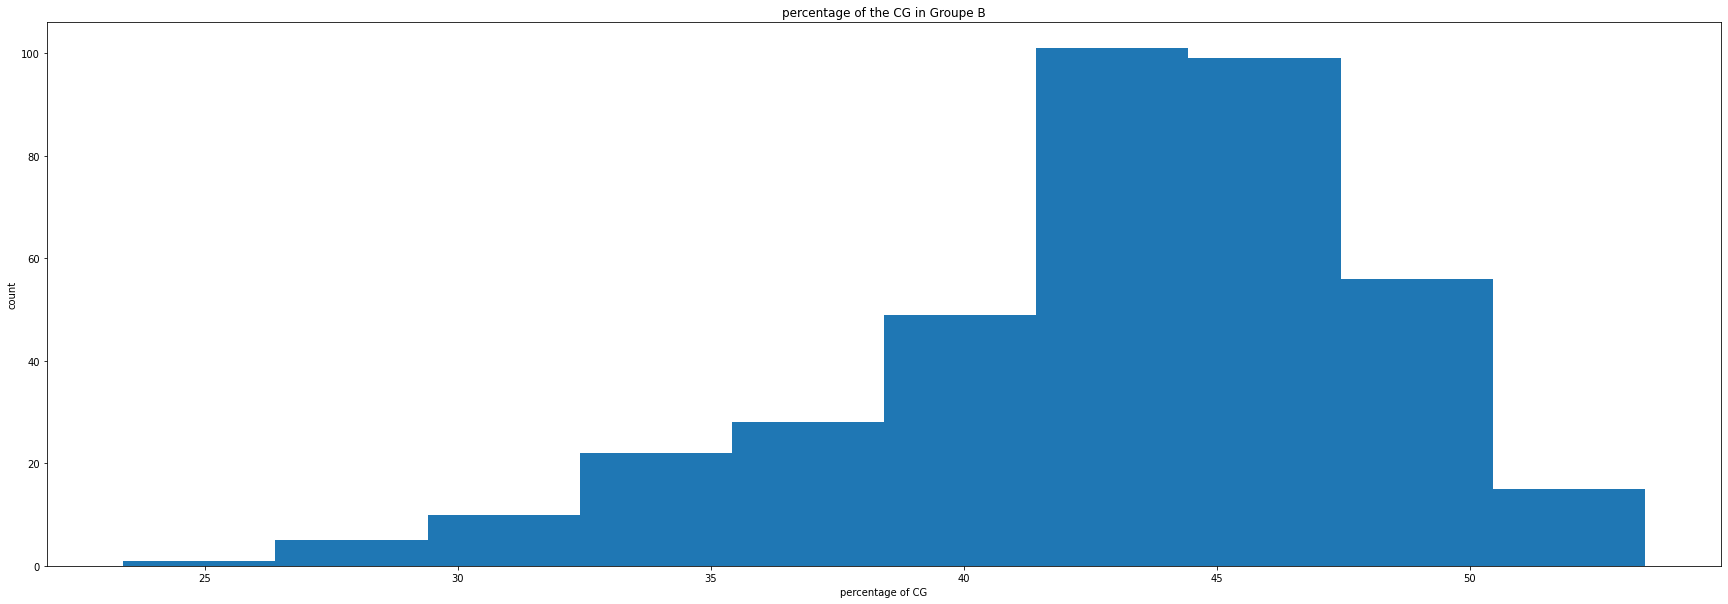

In [43]:
fig, axs = plt.subplots(1)
fig.set_size_inches(30, 10)
axs.hist(df_protine['CG'][df_protine['intersection_with_transmember']])
axs.set(ylabel='count', xlabel='percentage of CG')
axs.set_title('percentage of the CG in Groupe B')

In [44]:
b = df_protine[df_protine['intersection_with_transmember']]
temp_lest = [[] , []]
temp_lest[0].append(b['CG'].mean())
temp_lest[0].append(b['CG'].median())
temp_lest[0].append(b['CG'].min())
temp_lest[0].append(b['CG'].max())
print("B Group:\nmean {}\nmedian {}\nmin {}\nmax {}".format(temp_lest[0][0] , temp_lest[0][1] , temp_lest[0][2], temp_lest[0][3] ))

B Group:
mean 43.02937424584314
median 43.925300019400794
min 23.383084577114428
max 53.463732681336595


In [45]:
a = df_protine
temp_lest[1].append(a['CG'].mean())
temp_lest[1].append(a['CG'].median())
temp_lest[1].append(a['CG'].min())
temp_lest[1].append(a['CG'].max())
print("A Group:\nmean {}\nmedian {}\nmin {}\nmax {}".format(temp_lest[1][0] , temp_lest[1][1] , temp_lest[1][2], temp_lest[1][3] ))

A Group:
mean 42.99335683927281
median 43.8508877501644
min 20.833333333333336
max 56.438026474127554


In [46]:
a_not_b = df_protine[ df_protine['intersection'] == False]

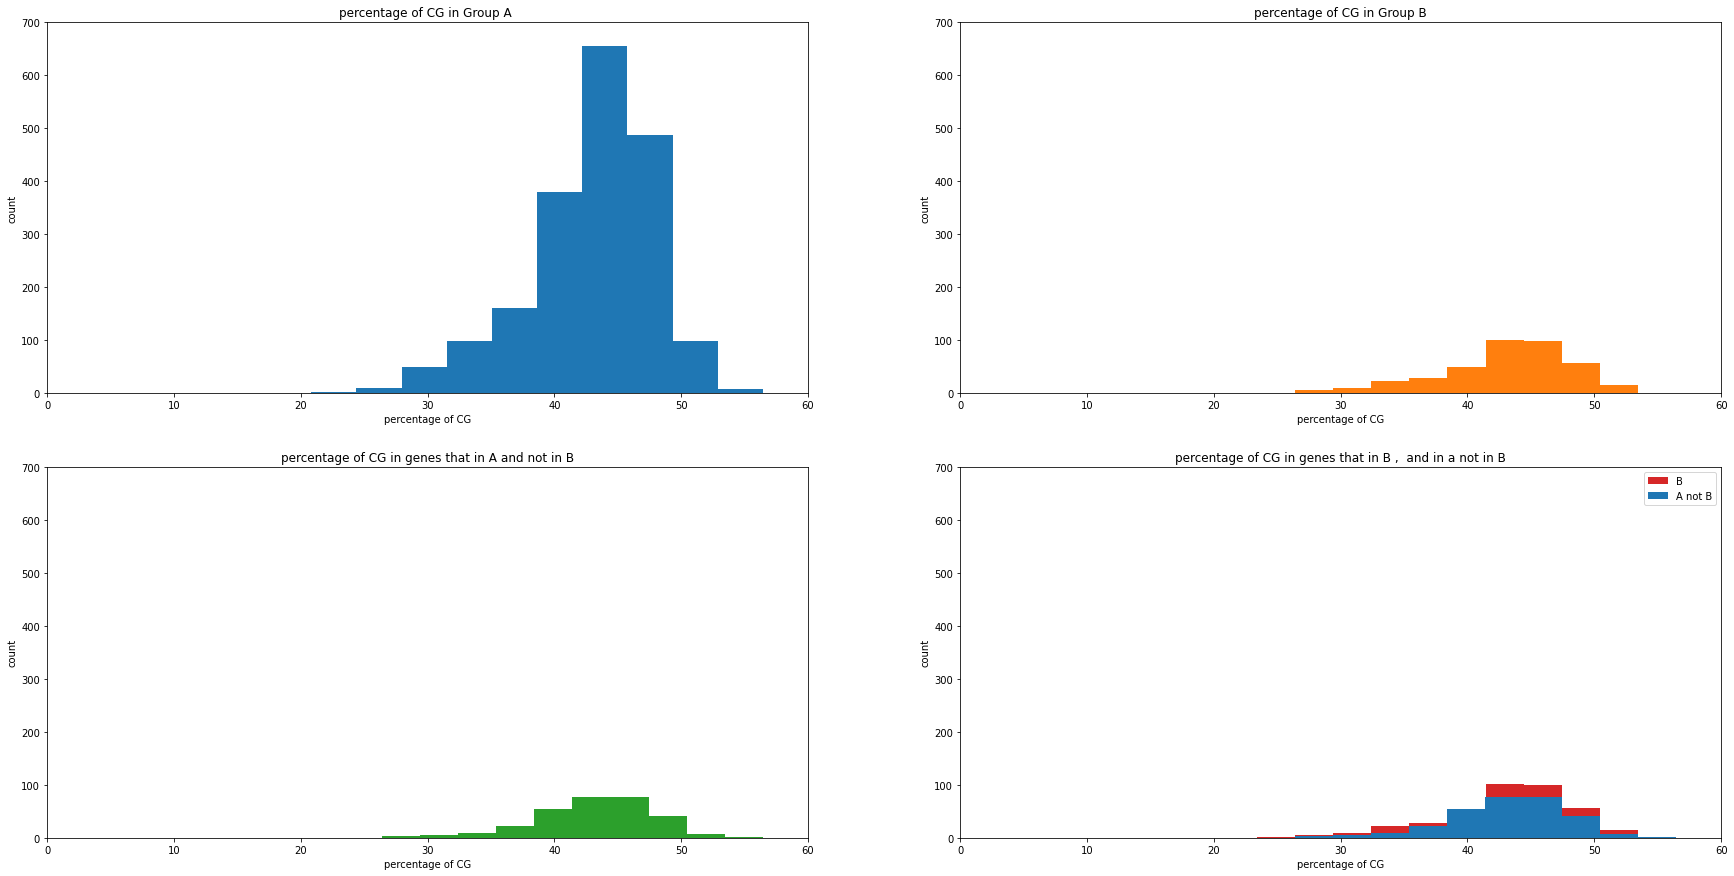

In [47]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 15)
axs[0, 0].hist(a['CG'] )
axs[0, 0].set_title('percentage of CG in Group A ')
axs[0, 1].hist(b['CG'], color = 'tab:orange' )
axs[0, 1].set_title('percentage of CG in Group B')
axs[1, 0].hist(a_not_b["CG"], color = 'tab:green')
axs[1, 0].set_title('percentage of CG in genes that in A and not in B')
axs[1, 1].hist(b['CG'], color = 'tab:red' , label='B' )
axs[1, 1].hist(a_not_b['CG'], color = 'tab:blue' , label='A not B' )
axs[1, 1].set_title('percentage of CG in genes that in B ,  and in a not in B')
axs[1 , 1].legend()

for ax in axs.flat:
    ax.set(ylabel='count', xlabel='percentage of CG')
    ax.set_ylim([0, 700])
    ax.set_xlim([0 , 60])

Part 3

In [48]:
corona_gene_bank_file = './NC_0455122.gb'
assert (os.path.exists(corona_gene_bank_file))  # making sure that the path is valid
# read file:
with open(corona_gene_bank_file, "r") as input_handle:
    corona_gen = SeqIO.parse(input_handle, "genbank")
    print(type(corona_gen))
    record_corona_gb = next(corona_gen)  # content of 1st record

<class 'Bio.SeqIO.InsdcIO.GenBankIterator'>


1

In [49]:
aminos = {'Phe':[],'Leu':[], 'Ile':[], 'Val':[],"Ser":[],"Pro":[],"Thr":[],"Ala":[],"Tyr" :[],"His":[] , "Gln":[] , "Asn":[], "Lys":[] , "Asp":[] , "Glu":[] , "Cys":[]  , "Trp": [] , "Arg":[] , "Gly":[]}
def insert_codon( aminos , value , the_key): #insert codons into dictionary
    aminos[the_key].append(value)

In [50]:
insert_codon(aminos , 'TTT' , "Phe")
insert_codon(aminos , 'TTC' , "Phe")
insert_codon(aminos , 'TTA' , "Leu")
insert_codon(aminos , 'TTG' , "Leu")
insert_codon(aminos , 'CTT' , "Leu")
insert_codon(aminos , 'CTC' , "Leu")
insert_codon(aminos , 'CTA' , "Leu")
insert_codon(aminos , 'CTG' , "Leu")
insert_codon(aminos , 'ATT' , "Ile")
insert_codon(aminos , 'ATC' , "Ile")
insert_codon(aminos , 'ATA' , "Ile")
insert_codon(aminos , 'GTT' , "Val")
insert_codon(aminos , 'GTC' , "Val")
insert_codon(aminos , 'GTA' , "Val")
insert_codon(aminos , 'GTG' , "Val")
insert_codon(aminos , 'TCT' , "Ser")
insert_codon(aminos , 'TCC' , "Ser")
insert_codon(aminos , 'TCA' , "Ser")
insert_codon(aminos , 'TCG' , "Ser")
insert_codon(aminos , 'CCT' , "Pro")
insert_codon(aminos , 'CCC' , "Pro")
insert_codon(aminos , 'CCA' , "Pro")
insert_codon(aminos , 'CCG' , "Pro")
insert_codon(aminos , 'ACT' , "Thr")
insert_codon(aminos , 'ACC' , "Thr")
insert_codon(aminos , 'ACA' , "Thr")
insert_codon(aminos , 'ACG' , "Thr")
insert_codon(aminos , 'GCT' , "Ala")
insert_codon(aminos , 'GCC' , "Ala")
insert_codon(aminos , 'GCA' , "Ala")
insert_codon(aminos , 'GCG' , "Ala")
insert_codon(aminos , 'TAT' , "Tyr")
insert_codon(aminos , 'TAC' , "Tyr")
insert_codon(aminos , 'CAT' , "His")
insert_codon(aminos , 'CAC' , "His")
insert_codon(aminos , 'CAA' , "Gln")
insert_codon(aminos , 'CAG' , "Gln")
insert_codon(aminos , 'AAT' , "Asn")
insert_codon(aminos , 'AAC' , "Asn")
insert_codon(aminos , 'AAA' , "Lys")
insert_codon(aminos , 'AAG' , "Lys")
insert_codon(aminos , 'GAT' , "Asp")
insert_codon(aminos , 'GAC' , "Asp")
insert_codon(aminos , 'GAA' , "Glu")
insert_codon(aminos , 'GAG' , "Glu")
insert_codon(aminos , 'TGT' , "Cys")
insert_codon(aminos , 'TGC' , "Cys")
insert_codon(aminos , 'TGG' , "Trp")
insert_codon(aminos , 'CGT' , "Arg")
insert_codon(aminos , 'CGC' , "Arg")
insert_codon(aminos , 'CGA' , "Arg")
insert_codon(aminos , 'CGG' , "Arg")
insert_codon(aminos , 'AGT' , "Ser")
insert_codon(aminos , 'AGC' , "Ser")
insert_codon(aminos , 'AGA' , "Arg")
insert_codon(aminos , 'AGG' , "Arg")
insert_codon(aminos , 'GGT' , "Gly")
insert_codon(aminos , 'GGC' , "Gly")
insert_codon(aminos , 'GGA' , "Gly")
insert_codon(aminos , 'GGG' , "Gly")
aminos

{'Ala': ['GCT', 'GCC', 'GCA', 'GCG'],
 'Arg': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
 'Asn': ['AAT', 'AAC'],
 'Asp': ['GAT', 'GAC'],
 'Cys': ['TGT', 'TGC'],
 'Gln': ['CAA', 'CAG'],
 'Glu': ['GAA', 'GAG'],
 'Gly': ['GGT', 'GGC', 'GGA', 'GGG'],
 'His': ['CAT', 'CAC'],
 'Ile': ['ATT', 'ATC', 'ATA'],
 'Leu': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
 'Lys': ['AAA', 'AAG'],
 'Phe': ['TTT', 'TTC'],
 'Pro': ['CCT', 'CCC', 'CCA', 'CCG'],
 'Ser': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
 'Thr': ['ACT', 'ACC', 'ACA', 'ACG'],
 'Trp': ['TGG'],
 'Tyr': ['TAT', 'TAC'],
 'Val': ['GTT', 'GTC', 'GTA', 'GTG']}

In [51]:
def find_in_dic(aminos, word):
    for homtsa, codon_list in aminos.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if word in codon_list:
            return homtsa
synonym_count = 0
res_dict = {}
from Bio.Seq import Seq
codons = ['C' , 'G' , 'T' , 'A']
for i in record_corona_gb.features:
    if 'translation' in i.qualifiers:
        x = record_corona_gb.seq[i.location.start.position:i.location.end.position]
        if len(x) % 3 == 0:
            x = Seq(x)
            for index in range(0 , len(x) , 3):
                for z in range(3):
                    char1 = x[index]
                    char2 = x[index + 1]
                    char3 = x[index + 2]
                    the_codon = char1 + char2 +char3
                    old_khomtsa = find_in_dic(aminos , the_codon)

                    for w in codons:
                        if w == the_codon[z]:
                            continue
                        the_codon2 = the_codon
                        lst = list(the_codon2)
                        lst[z] =w
                        the_codon2 = ''.join(lst)

                        new_khomtsa = find_in_dic(aminos , the_codon2)
                        if old_khomtsa == new_khomtsa:
                            if the_codon in res_dict:
                                res_dict[the_codon] = res_dict[the_codon]+1 ##old_khomtsa
                            else:
                                res_dict[the_codon] = 1
print(res_dict)



{'GAG': 94, 'AGC': 29, 'CTT': 645, 'GTC': 216, 'CCT': 423, 'GGT': 738, 'TTC': 106, 'AAC': 129, 'AAA': 260, 'ACA': 636, 'CAC': 37, 'CAA': 188, 'CTC': 210, 'AGT': 115, 'TTG': 272, 'GTT': 849, 'TTA': 338, 'CAG': 89, 'CGC': 63, 'GAC': 124, 'GTG': 243, 'GTA': 354, 'CGT': 180, 'GGC': 246, 'TTT': 253, 'GGA': 261, 'TCC': 135, 'TCA': 414, 'GCA': 396, 'CAT': 82, 'GAT': 209, 'ACT': 738, 'TGT': 158, 'GAA': 247, 'CCC': 69, 'TAT': 178, 'ATC': 152, 'TCG': 36, 'GCT': 765, 'CGA': 56, 'CTG': 148, 'ATT': 402, 'TAC': 130, 'ATA': 216, 'CCA': 327, 'AAG': 144, 'AAT': 252, 'GCC': 213, 'CTA': 280, 'ACC': 162, 'GGG': 39, 'TGC': 50, 'AGG': 72, 'ACG': 72, 'TCT': 480, 'AGA': 198, 'GCG': 66, 'CCG': 33, 'CGG': 28, 'TAA': 18, 'TGA': 1, 'TAG': 1}


2

In [52]:
corona_gene_bank_file = './NC_0455122.gb'
assert (os.path.exists(corona_gene_bank_file))  # making sure that the path is valid
# read file:
with open(corona_gene_bank_file, "r") as input_handle:
    corona_gen = SeqIO.parse(input_handle, "genbank")
    record_july = next(corona_gen)  # content of 1st record

In [53]:
corona_gene_bank_file = './LC6669241.gb'
assert (os.path.exists(corona_gene_bank_file))  # making sure that the path is valid
# read file:
with open(corona_gene_bank_file, "r") as input_handle:
    corona_gen2 = SeqIO.parse(input_handle, "genbank")
    record_january = next(corona_gen2)  # content of 1st record

In [54]:
dictionary_before_df = {'Kind_Gene': [], 'start': [], 'end': [], 'strand': []}

for index, i in enumerate(record_july.features[2:len(record_july.features )-2]): #add relevent data to the dictionary_before_df
    dictionary_before_df['Kind_Gene'].append(i.type)
    dictionary_before_df['start'].append(i.location.start.position)
    dictionary_before_df['end'].append(i.location.end.position)
    dictionary_before_df['strand'].append((i.strand))
df_data_july = pd.DataFrame.from_dict(dictionary_before_df)                 ##convert the dictionary into dataframe


In [55]:

dictionary_before_df2 = {'Kind_Gene': [], 'start': [], 'end': [], 'strand': []}

for index, i in enumerate(record_january.features[2:len(record_january.features)-1]): #add relevent data to the dictionary_before_df
    dictionary_before_df2['Kind_Gene'].append(i.type)
    dictionary_before_df2['start'].append(i.location.start.position)
    dictionary_before_df2['end'].append(i.location.end.position)
    dictionary_before_df2['strand'].append((i.strand))
df_data_january = pd.DataFrame.from_dict(dictionary_before_df2)        ##convert the dictionary into dataframe


In [56]:
name_genes_july = {}
### get the name of the gene if there in name , if there is no name just get the locus_tage of it.
for index , i in enumerate(record_july.features[2:len(record_july.features )-2]):
    if 'gene' in i.qualifiers:
        name_genes_july[index] = i.qualifiers['gene'][0]

In [57]:
name_genes_january = {}
#get the name of the gene if there in name , if there is no name just get the locus_tage of it.
for index , i in enumerate(record_january.features[2:len(record_january.features)-1]):
    if 'gene' in i.qualifiers:
           name_genes_january[index] = i.qualifiers['gene'][0]

In [58]:
df_data_july['name'] = pd.Series(name_genes_july)
df_data_january['name'] = pd.Series(name_genes_january)

In [59]:
df_july_after_zero = {}
for i in range(len(df_data_july['name'])):
    df_july_after_zero[i] = 0

df_january_after_zero = {}
for i in range(len(df_data_january['name'])):
    df_january_after_zero[i] = 0

for index, i in enumerate(df_data_july['name']):
    for index1, j in enumerate(df_data_january['name']):
        if i == j:
            df_july_after_zero[index] = 1
            df_january_after_zero[index1] = 1


In [60]:
#check how many genes is 0
if(list(df_july_after_zero.values()).count(0) == 0):
    print("all of the genes are in common")
else:
    print("there is genes not in common")

if(list(df_january_after_zero.values()).count(0) == 0):
    print("all of the genes are in common")
else:
    print("there is genes not in common")

all of the genes are in common
all of the genes are in common


In [61]:
df_data_july ['len'] = df_data_july['end'] - df_data_july['start'] #calculate the len of the gene
df_data_january ['len'] = df_data_january['end'] - df_data_january['start'] #calculate the len of the gene

In [62]:
df_data_july

,Kind_Gene,start,end,strand,name,len
0,gene,265,21555,1,ORF1ab,21290
1,CDS,265,21555,1,ORF1ab,21290
2,mat_peptide,265,805,1,ORF1ab,540
3,mat_peptide,805,2719,1,ORF1ab,1914
4,mat_peptide,2719,8554,1,ORF1ab,5835
5,mat_peptide,8554,10054,1,ORF1ab,1500
6,mat_peptide,10054,10972,1,ORF1ab,918
7,mat_peptide,10972,11842,1,ORF1ab,870
8,mat_peptide,11842,12091,1,ORF1ab,249
9,mat_peptide,12091,12685,1,ORF1ab,594


In [63]:
df_data_january

,Kind_Gene,start,end,strand,name,len
0,gene,254,21544,1,ORF1ab,21290
1,CDS,254,21544,1,ORF1ab,21290
2,CDS,254,13472,1,ORF1ab,13218
3,gene,21551,25367,1,S,3816
4,CDS,21551,25367,1,S,3816
5,gene,25375,26203,1,ORF3a,828
6,CDS,25375,26203,1,ORF3a,828
7,gene,26227,26455,1,E,228
8,CDS,26227,26455,1,E,228
9,gene,26505,27174,1,M,669


In [64]:
def translte(seq):
    return seq.translate(table = 11)


In [65]:
def pairWizeAligner(a , b):
    aligner = Align.PairwiseAligner()
    aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
    alignments = aligner.align(a, b)
    alignments = sorted(alignments , reverse=True)
    return alignments[0].__str__().split('\n')[0] ,  alignments[0].__str__().split('\n')[2]

In [66]:
def gapsFromPeptide( peptide_seq, nucleotide_seq ):
    """ Transfers gaps from aligned peptide seq into codon partitioned nucleotide seq (codon alignment)
          - peptide_seq is an aligned peptide sequence with gaps that need to be transferred to nucleotide seq
          - nucleotide_seq is an un-aligned dna sequence whose codons translate to peptide seq"""
    def chunks(l, n):
        """ Yield successive n-sized chunks from l."""
        for i in range(0, len(l), n):
            yield l[i:i+n]
    codons = [codon for codon in chunks(nucleotide_seq,3)]  #splits nucleotides into codons (triplets)
    gappedCodons = []
    codonCount = 0
    for aa in peptide_seq:  #adds '---' gaps to nucleotide seq corresponding to peptide
        if aa!='-':
            gappedCodons.append(codons[codonCount])
            codonCount += 1
        else:
            gappedCodons.append('---')
    return(''.join(gappedCodons))


In [67]:
lst = [[3, 31] , [9, 37] , [7, 35] ,[5, 33] , [19, 47] ]

In [68]:
for i in range (5):
    name = df_data_january['name'][lst[i][0]]
    start1 = df_data_january['start'][lst[i][0]]
    end1 =df_data_january['end'][lst[i][0]] - 6
    seq1 =record_january.seq[start1:end1]

    start2 = df_data_july['start'][lst[i][1]]
    end2 =df_data_july['end'][lst[i][1]] - 12
    seq2 =record_july.seq[start2:end2]

    trans1 = translte(seq1)
    trans2 = translte(seq2)
    pairwize1 , pairwize2 = pairWizeAligner(trans1 , trans2)
    conv1 = gapsFromPeptide(pairwize1 ,str(seq1))
    conv2 = gapsFromPeptide(pairwize2 ,str(seq2))

    conSeq1 = CodonSeq(conv1)
    conSeq2 = CodonSeq(conv2)

    dN, dS = cal_dn_ds(conSeq1, conSeq2)
    print("name: {}".format(name))
    if dS == 0:

        print("negative selection")
        print("dN: {}".format(dN))
        print("dS: {}".format(dS))
        print("dN/dS: zeroooo")
        print("="*40)
        continue

    dN_dS_ratio = float(dN / dS)
    if dN_dS_ratio > 1:
        print("positive selection")
    else:
        print("negative selection")

    print("dN:%0.3f " % dN)
    print("dS:%0.3f " % dS)
    print("dN/dS:%0.3f " % dN_dS_ratio)
    print("="*40)

name: S
negative selection
dN:0.000 
dS:0.001 
dN/dS:0.284 
name: M
negative selection
dN: 0.0
dS: 0.0
dN/dS: zeroooo
name: E
negative selection
dN: 0.0
dS: 0.0
dN/dS: zeroooo
name: ORF3a
negative selection
dN: 0.0
dS: 0.0
dN/dS: zeroooo
name: N
negative selection
dN: 0.0
dS: 0.0
dN/dS: zeroooo
